# **MIE 1624 Introduction to Data Science and Analytics – Winter 2023**

# **Assignment 3**

Anbumanivel Mohan Suganthi - 1008696653 <br>
April 9, 2023

# **1. Data collection and cleaning**

In [ ]:
!pip install openai
!pip install openai-manager
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import openai
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
openai.api_key = ### Enter your api key

In [ ]:
'''Web scraping code'''
# import pandas as pd
# from bs4 import BeautifulSoup
# from datetime import datetime
# from selenium import webdriver
# from selenium.webdriver.common.by import By

# """### Path to webdriver (Firefox, Chrome) """

# # Ensure that the driver path is correct before running this script.
# # Microsoft Windows
# driver_path = "C:/Users/lenovo-pc/Downloads/geckodriver-v0.32.2-win64/geckodriver.exe"
# # Linux
# #driver_path = "./drivers/linux/geckodriver"
# driver = webdriver.Firefox(executable_path=driver_path)

# """### Define position and location """

# ## Enter a job position
# position = "data scientist"
# ## Enter a location (City, State or Zip or remote)
# locations = "New York, NY"

# def get_url(position, location):
#     url_template = "https://www.indeed.com/jobs?q={}&l={}"
#     url = url_template.format(position, location)
#     return url

# url = get_url(position, locations)
# dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])

# """### Scrape job postings"""

# ## Number of postings to scrape
# postings = 300

# jn=0
# for i in range(0, postings, 10):
#     driver.get(url + "&start=" + str(i))
#     driver.implicitly_wait(3)

#     jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

#     for job in jobs:
#         result_html = job.get_attribute('innerHTML')
#         soup = BeautifulSoup(result_html, 'html.parser')
        
#         jn += 1
        
#         liens = job.find_elements(By.TAG_NAME, "a")
#         links = liens[0].get_attribute("href")
#         try:
#             title = soup.select('.jobTitle')[0].get_text().strip()
#         except:
#             title = 'NaN'
#         try:
#             company = soup.select('.companyName')[0].get_text().strip()
#         except:
#             company = 'NaN'
#         try:
#             location = soup.select('.companyLocation')[0].get_text().strip()
#         except:
#             location = 'NaN'
#         try:
#             salary = soup.select('.salary-snippet-container')[0].get_text().strip()
#         except:
#             salary = 'NaN'
#         try:
#             rating = soup.select('.ratingNumber')[0].get_text().strip()
#         except:
#             rating = 'NaN'
#         try:
#             date = soup.select('.date')[0].get_text().strip()
#         except:
#             date = 'NaN'
#         try:
#             description = soup.select('.job-snippet')[0].get_text().strip()
#         except:
#             description = ''
       
#         dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
#                                           "Company": company,
#                                           'Location': location,
#                                           'Rating': rating,
#                                           'Date': date,
#                                           "Salary": salary,
#                                           "Description": description,
#                                           "Links": links}])], ignore_index=True)
#         print("Job number {0:4d} added - {1:s}".format(jn,title))

# driver.quit()

# """### Scrape full job descriptions"""

# Links_list = dataframe['Links'].tolist()
# #Links_list

# import random
# import time

# driver = webdriver.Firefox(executable_path=driver_path)
# descriptions=[]
# for i in Links_list:
#     driver.get(i)
#     driver.implicitly_wait(random.randint(3, 8))
#     jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
#     descriptions.append(jd)
#     time.sleep(random.randint(5,10))

# dataframe['Descriptions'] = descriptions

# driver.quit()

# """### Save results"""

# # Convert the dataframe to a csv file
# date = datetime.today().strftime('%Y-%m-%d')
# dataframe.to_csv(date + "_" + position + "_" + locations + ".csv", index=False)

# dataframe 

'Web scraping code'

In [ ]:
# Reading the web scraped csv data file 
data = pd.read_csv('webscraping_results_assignmnet3.csv')
data

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Scientist,"The Travelers Companies, Inc.","Remote in Hartford, CT",3.6,PostedToday,"$121,700 - $200,800 a year","Heavy concentration in mathematics, including ...",https://www.indeed.com/rc/clk?jk=e22cc0a1a01f9...,"Who Are We?\nTaking care of our customers, our..."
1,Data Scientist - Quality and Safety - REMOTE,MEDSTAR HEALTH,"Remote in Washington, DC 20008",3.6,PostedPosted 30+ days ago,NaN,Under general supervision of the Senior Direct...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Data Scientist supports clinical quality a...
2,Data Scientist,"Kyndryl, Inc.","Remote in New York, NY",3.6,PostedToday,"$193,194 a year","Formulate the project, design machine learning...",https://www.indeed.com/rc/clk?jk=abffd8ab6a844...,Your Role and Responsibilities\nData Scientist...
3,Data Scientist - RWD,Norstella,Remote,NaN,PostedPosted 7 days ago,"$150,000 - $175,000 a year",Design data pipelines and queries and analyze ...,https://www.indeed.com/company/NorStella/jobs/...,Job Summary:\nWe are seeking an experienced Da...
4,Associate Data Scientist,Protective Life Corporation,Remote,3.6,PostedToday,"$75,000 - $100,000 a year","Develop project plans, execute on deliverables...",https://www.indeed.com/rc/clk?jk=178c34d1aff67...,The work we do has an impact on millions of li...
...,...,...,...,...,...,...,...,...,...
1795,Business Analyst,Granite Solutions Groupe,"Manhattan, NY",NaN,PostedPosted 1 day ago,NaN,5+ years of relevant experience in data analys...,https://www.indeed.com/rc/clk?jk=2d795f7391091...,Job Category: Business Analysis\nJob Location:...
1796,Scientific Analyst,theMednet,"New York, NY",NaN,PostedPosted 30+ days ago,NaN,Ability to interpret data and run statistical ...,https://www.indeed.com/rc/clk?jk=417bce4d64889...,The Company\ntheMednet is a question and answe...
1797,Data Analyst,1199SEIU Training and Employment Funds,"New York, NY",3.9,PostedPosted 30+ days ago,NaN,Assist business units with recording outcomes ...,https://www.indeed.com/rc/clk?jk=20bcd34644266...,Responsibilities\n\nAssist Associate Director ...
1798,Senior Business Analyst,Intuit,"New York, NY 10012",4.2,PostedPosted 7 days ago,NaN,3-5 years of relevant business experience incl...,https://www.indeed.com/rc/clk?jk=8b24d43ee3294...,Overview\nCome join our Business Operations (B...


In [ ]:
# Cleaning salary column
def salary(text):
  if pd.isna(text):
    return np.nan
  salary_range = text.replace('$', '').replace(',', '').split(' - ')
  if text.startswith('Up to'):
    salary = float(salary_range[0].split()[2])
  elif text.startswith('From'):
    salary = float(salary_range[0].split()[1])
  elif "-" not in text:
    salary = float(salary_range[0].split()[0])
  else:
    min_salary = float(salary_range[0])
    max_salary = float(salary_range[1].split()[0])
    salary = (min_salary+max_salary)/2
  if 'hour' in text:
    return salary*40*52
  elif 'week' in text:
    return salary*52
  elif 'month' in text:
    return salary*12
  else:
    return salary

data['Cleaned Salary'] = data['Salary'].apply(salary)

In [ ]:
# Replacing the missing values of salary to the most common value
# The first 900 rows are "Data Scientist" and the last 900 rows are "Data Analyst"
# Therefore replacing with their respective most common value
mode_salary_1 = data.loc[:899, 'Cleaned Salary'].mode()[0]
mode_salary_2 = data.loc[900:, 'Cleaned Salary'].mode()[0]
data.loc[:899, 'Cleaned Salary'].fillna(mode_salary_1, inplace=True)
data.loc[900:, 'Cleaned Salary'].fillna(mode_salary_2, inplace=True)

In [ ]:
# Dropping duplicated columns and other non-related columns
data = data.drop_duplicates(keep=False)
data = data.drop(['Salary', 'Description', 'Rating','Date','Links'], axis=1)
data.rename(columns={'Cleaned Salary': 'Salary'}, inplace=True)
data

,Title,Company,Location,Descriptions,Salary
0,Data Scientist,"The Travelers Companies, Inc.","Remote in Hartford, CT","Who Are We?\nTaking care of our customers, our...",161250.0
1,Data Scientist - Quality and Safety - REMOTE,MEDSTAR HEALTH,"Remote in Washington, DC 20008",The Data Scientist supports clinical quality a...,150000.0
3,Data Scientist - RWD,Norstella,Remote,Job Summary:\nWe are seeking an experienced Da...,162500.0
4,Associate Data Scientist,Protective Life Corporation,Remote,The work we do has an impact on millions of li...,87500.0
5,Associate Data Scientist - Online Business Ana...,Home Depot / THD,"Remote in Atlanta, GA 30301",Position Purpose:\nThe Associate Data Scientis...,150000.0
...,...,...,...,...,...
1793,Business Analyst II- HBA05-2,Horizon Blue Cross Blue Shield of New Jersey,"Wall, NJ",Horizon BCBSNJ employees must live in New Jers...,78490.0
1795,Business Analyst,Granite Solutions Groupe,"Manhattan, NY",Job Category: Business Analysis\nJob Location:...,80000.0
1797,Data Analyst,1199SEIU Training and Employment Funds,"New York, NY",Responsibilities\n\nAssist Associate Director ...,80000.0
1798,Senior Business Analyst,Intuit,"New York, NY 10012",Overview\nCome join our Business Operations (B...,80000.0


In [ ]:
# Checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1551 non-null   object 
 1   Company       1549 non-null   object 
 2   Location      1551 non-null   object 
 3   Descriptions  1551 non-null   object 
 4   Salary        1551 non-null   float64
dtypes: float64(1), object(4)
memory usage: 72.7+ KB


In [ ]:
# Defining a function which does all required text preprocessing on a given dataframe
def description_pre_processing(df):
  df_copy=df.copy(deep=True)

  # Changing to lowercase 
  df_copy['Descriptions_pre-processed'] = df_copy['Descriptions'].apply(lambda x: " ".join(x.lower() for x in x.split()))

  # Removing emojis
  def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text
  
  df_copy["Descriptions"] = df_copy["Descriptions"].apply(remove_emoji)

  # Removing special characters and words following @
  special_char=["http\S*", "www.(\w+)", "t.co\S*","[^a-zA-Z\s]","[^\w\s]"]
  for i in special_char:
    df_copy['Descriptions_pre-processed'] = df_copy['Descriptions_pre-processed'].str.replace(i, '', regex=True)

  # Removing rows which have no non-whitespace characters
  df_copy_1=df_copy.copy(deep=True)
  df_copy_1['Descriptions_pre-processed'] = df_copy_1['Descriptions_pre-processed'].str.replace(' ','')
  idx=(df_copy_1['Descriptions_pre-processed'].apply(lambda x:len(x)))>0
  df_copy=df_copy[idx]

  # Removing stopwords
  stop_words = stopwords.words('english')
  df_copy['Descriptions_pre-processed'] = df_copy['Descriptions_pre-processed'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

  return df_copy

In [ ]:
# Preprocessing the 'Descriptions' column
df = description_pre_processing(data)

In [ ]:
# Saving the pre-processed dataframe as csv file
df.to_csv('Assignment-3_pre-processed.csv', sep=',', index=False)

In [ ]:
# Resetting the index
df = df.reset_index(drop=True)
df

,Title,Company,Location,Descriptions,Salary,Descriptions_pre-processed
0,Data Scientist,"The Travelers Companies, Inc.","Remote in Hartford, CT","Who Are We?\nTaking care of our customers, our...",161250.0,taking care customers communities thats travel...
1,Data Scientist - Quality and Safety - REMOTE,MEDSTAR HEALTH,"Remote in Washington, DC 20008",The Data Scientist supports clinical quality a...,150000.0,data scientist supports clinical quality safet...
2,Data Scientist - RWD,Norstella,Remote,Job Summary:\nWe are seeking an experienced Da...,162500.0,job summary seeking experienced data scientist...
3,Associate Data Scientist,Protective Life Corporation,Remote,The work we do has an impact on millions of li...,87500.0,work impact millions lives part help protect c...
4,Associate Data Scientist - Online Business Ana...,Home Depot / THD,"Remote in Atlanta, GA 30301",Position Purpose:\nThe Associate Data Scientis...,150000.0,position purpose associate data scientist resp...
...,...,...,...,...,...,...
1546,Business Analyst II- HBA05-2,Horizon Blue Cross Blue Shield of New Jersey,"Wall, NJ",Horizon BCBSNJ employees must live in New Jers...,78490.0,horizon bcbsnj employees must live new jersey ...
1547,Business Analyst,Granite Solutions Groupe,"Manhattan, NY",Job Category: Business Analysis\nJob Location:...,80000.0,job category business analysis job location ma...
1548,Data Analyst,1199SEIU Training and Employment Funds,"New York, NY",Responsibilities\n\nAssist Associate Director ...,80000.0,responsibilities assist associate director imp...
1549,Senior Business Analyst,Intuit,"New York, NY 10012",Overview\nCome join our Business Operations (B...,80000.0,overview come join business operations bizops ...


a). To begin with, I conducted web scraping of job postings separately for data scientists and data analysts in both remote and New York locations, resulting in a total of 1800 job postings. I extracted various details including the job title, company name, job location, rating, date posted, salary information, job description, and other relevant job details. Subsequently, I combined the extracted data from all four sources and saved it in a new CSV file named "Assignment 3 webscraped data.csv".<br>
For data cleaning, the salary column was the first to be addressed. The values in the salary column were in different formats such as salary per hour, salary per month, salary per week, and salary per year. Most of the values were in a range format, and the average was computed. For the missing values in the first 900 rows, the mode of the first 900 values was computed, and the same was done for the last 900 rows.<br>
Next, duplicate columns and other non-relevant columns such as ‘Description‘, ‘Rating‘, ‘Date‘, and ‘Links‘ were dropped. Afterward, text preprocessing was performed on the 'Description' column, including converting all text to lowercase, removing emojis and special characters, removing rows with no non-whitespace characters, and removing stop words.


# **2. Exploratory data analysis and feature engineering**

In [ ]:
# Function that takes text as input and returns the response from ChatGPT
def ChatGPT_info(text):
  MODEL = "gpt-3.5-turbo"
  response = openai.ChatCompletion.create(model = MODEL, messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": text}])
  return response

In [ ]:
# Asking ChatGPT for the skills for data scientist and data analyst
response = ChatGPT_info("Can you tell me some skills that are required for a data scientist?")
response_1 = ChatGPT_info("Can you tell me some soft skills that are required for a data scientist?")
response_2 = ChatGPT_info("Can you tell me some hard skills that are required for a data scientist?")
response_3 = ChatGPT_info("Can you tell me some skills that are required for a data analyst?")
response_4 = ChatGPT_info("Can you tell me some soft skills that are required for a data analyst?")
response_5 = ChatGPT_info("Can you tell me some hard skills that are required for a data analyst?")

In [ ]:
# ChatGPT response for data scientist skills
print(response.choices[-1].message.content)

Certainly! Some essential skills for a data scientist include:

1. Programming languages such as Python, R, and SQL
2. Statistical analysis and modeling
3. Machine learning algorithms and techniques
4. Data visualization tools like Tableau, D3.js or ggplot2
5. Understanding of Big Data technologies such as Hadoop, Spark, or Kafka
6. Cloud computing platforms, such as Amazon Web Services or Microsoft Azure
7. Knowledge of data cleaning, pre-processing, and preparation techniques
8. Strategic problem-solving abilities
9. Good communication and teamwork skills, to effectively convey insights and work collaboratively with cross-functional teams
10. Business acumen to drive decision making and understand the impact of data analysis on business outcomes.


In [ ]:
# ChatGPT response for data scientist soft skills
print(response_1.choices[-1].message.content)

Sure! Here are some important soft skills that are essential for a data scientist:

1. Communication: The ability to effectively communicate complex technical concepts to non-technical stakeholders is crucial for a data scientist.

2. Problem-solving: Data scientists need to be able to use critical thinking and problem-solving skills to tackle difficult data-related problems.

3. Adaptability: A successful data scientist should be comfortable with adapting to new technologies, programming languages, and tools.

4. Teamwork: Data scientists often work as part of interdisciplinary teams, so being able to collaborate effectively is essential.

5. Creative thinking: Creativity is key in finding innovative solutions to complex data problems.

6. Curiosity: A strong desire to learn and explore new data sources and techniques is important for a data scientist.

7. Business acumen: Understanding the business context in which the data is analyzed is critical for providing actionable insights an

In [ ]:
# ChatGPT response for data scientist hard skills
print(response_2.choices[-1].message.content)

Certainly! Here are some hard skills that are often required for a data scientist:

1. Mathematics: A deep understanding of mathematical concepts and their application in data analysis is essential for a data scientist.

2. Statistics: The ability to apply statistical models and tools for analyzing data is critical for a data scientist.

3. Programming: Proficient programming skills are required for effective manipulation, management, and analysis of data. Proficiency in languages such as Python, R, and SQL is necessary.

4. Data Visualization: The knowledge of how to create effective data visualizations is important not only for making data accessible to others but also for gaining insights from large sets of data.

5. Machine Learning: Knowledge and experience in Machine Learning algorithms and techniques are essential for developing predictive models and making data-driven decisions.

6. Data Warehousing and ETL: Familiarity with Data Warehousing and ETL (Extract, Transform and Load

In [ ]:
# ChatGPT response for data analyst skills
print(response_3.choices[-1].message.content)

Certainly! Some of the key skills required for a data analyst include:

1. Data analysis and interpretation
2. Advanced knowledge of SQL and Excel
3. Experience with data visualization tools such as Tableau or Power BI
4. Strong understanding of statistics and modeling techniques
5. Familiarity with programming languages such as Python, R, or SAS
6. Effective communication and presentation skills
7. Attention to detail and ability to spot outliers or anomalies in data
8. Critical thinking and problem-solving skills
9. Ability to work independently and as part of a team
10. Prior experience with data mining and predictive analytics is also a plus.


In [ ]:
# ChatGPT response for data analyst soft skills
print(response_4.choices[-1].message.content)

Sure! Here are some essential soft skills for a data analyst:

1. Strong communication skills
2. Attention to detail
3. Problem-solving and critical thinking abilities
4. Time management and organizational skills
5. Interpersonal skills and ability to work well in a team
6. Adaptability and flexibility
7. Curiosity and a passion for learning
8. Business acumen and ability to understand the context and goals of the organization
9. Empathy and ability to understand the needs of stakeholders
10. Presentation skills and ability to effectively communicate findings and insights to non-technical stakeholders.


In [ ]:
# ChatGPT response for data analyst hard skills
print(response_5.choices[-1].message.content)

Certainly! Here are some hard skills that are often required for data analysts:

1. Proficiency in SQL or similar database query languages
2. Experience with statistical analysis software such as R or Python
3. Strong Excel skills, including the ability to work with large datasets
4. Knowledge of data visualization tools such as Tableau or Power BI
5. Familiarity with data cleaning and preparation techniques
6. Understanding of machine learning algorithms and their applications
7. Ability to manipulate and analyze data using programming languages such as Java, C++, or Perl
8. Knowledge of data modeling and database design principles
9. Experience with big data technologies such as Hadoop or Spark

These are just a few examples, as the specific hard skills required for a data analyst can vary depending on the job and industry.


In [ ]:
# Defining skills manually and by using ChatGPT
skills_manual = ['python', 'r', 'c', 'data manipulation', 'tensorflow', 'sql', 'java', 'javascript', 'matlab', 'machine learning', 
                 'project management', 'data visualization', 'hadoop', 'nosql', 'spark', 'tableau', 'aws', 'powerpoint', 'spss', 
                 'flink', 'keras', 'pytorch', 'docker', 'github', 'html', 'pandas', 'numpy', 'simulation', 'optimization']
skills_chatGPT = ['python', 'r', 'sql', 'big data', 'statistical analysis', 'modeling', 'machine learning', 'data visualization', 'tableau',
                  'hadoop', 'spark', 'kafka', 'cloud computing', 'amazon web services', 'data cleaning', 'preparation', 'problem solving', 
                  'communication', 'teamwork', 'business acumen', 'data analysis', 'time management', 'data warehousing', 'etl', 
                  'artificial intelligence', 'deep learning', 'ai', 'statistics', 'excel', 'power bi', 'presentation', 'critical thinking', 
                  'data mining', 'predictive analytics', 'interpersonal', 'flexibility', 'data modeling']

total_skills = list(set(skills_manual + skills_chatGPT))

In [ ]:
# Converting the skills to lowercase
total_skills = [skill.lower() for skill in total_skills]

In [ ]:
# Function that checks the skills in the descriptions column
def skills_check(text):
  skills_dict = {i: 0 for i in total_skills}
  for i in skills_dict:
    pattern = r"\b" + i.replace(" ", r"\s+") + r"\b"
    if re.search(pattern, text, re.IGNORECASE):
      skills_dict[i] = 1
  return skills_dict

In [ ]:
# Extracting the skills from descriptions
df['Skills'] = df['Descriptions'].apply(skills_check)

In [ ]:
# Encoding each skill in a seperate column with a value of 0 or 1
a = df.Skills.tolist()
df_skills = pd.DataFrame(a)

In [ ]:
df_skills

,business acumen,statistical analysis,c,teamwork,keras,data analysis,spark,kafka,cloud computing,data cleaning,...,statistics,interpersonal,pytorch,simulation,excel,spss,sql,time management,javascript,tableau
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1547,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1548,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1549,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Printing the count of each skill
print(df_skills.sum())

business acumen             54
statistical analysis       141
c                          153
teamwork                    63
keras                       38
data analysis              452
spark                      129
kafka                       27
cloud computing             37
data cleaning               24
amazon web services         12
python                     726
aws                        171
hadoop                      67
html                        26
big data                   137
project management         200
data manipulation           35
data modeling               83
optimization               208
powerpoint                 136
flink                        7
pandas                      86
nosql                       35
communication              864
data visualization         270
machine learning           531
r                          410
github                      31
numpy                       56
tensorflow                 114
matlab                      27
docker  

In [ ]:
# Storing the skills present in the description as a list
df['Skills'] = df['Skills'].apply(lambda X: [i for i, j in X.items() if j == 1])
df

,Title,Company,Location,Descriptions,Salary,Descriptions_pre-processed,Skills
0,Data Scientist,"The Travelers Companies, Inc.","Remote in Hartford, CT","Who Are We?\nTaking care of our customers, our...",161250.0,taking care customers communities thats travel...,"[statistical analysis, data analysis, aws, com..."
1,Data Scientist - Quality and Safety - REMOTE,MEDSTAR HEALTH,"Remote in Washington, DC 20008",The Data Scientist supports clinical quality a...,150000.0,data scientist supports clinical quality safet...,"[python, data visualization, machine learning,..."
2,Data Scientist - RWD,Norstella,Remote,Job Summary:\nWe are seeking an experienced Da...,162500.0,job summary seeking experienced data scientist...,"[python, sql]"
3,Associate Data Scientist,Protective Life Corporation,Remote,The work we do has an impact on millions of li...,87500.0,work impact millions lives part help protect c...,"[cloud computing, python, aws, data manipulati..."
4,Associate Data Scientist - Online Business Ana...,Home Depot / THD,"Remote in Atlanta, GA 30301",Position Purpose:\nThe Associate Data Scientis...,150000.0,position purpose associate data scientist resp...,"[data analysis, python, optimization, communic..."
...,...,...,...,...,...,...,...
1546,Business Analyst II- HBA05-2,Horizon Blue Cross Blue Shield of New Jersey,"Wall, NJ",Horizon BCBSNJ employees must live in New Jers...,78490.0,horizon bcbsnj employees must live new jersey ...,"[data analysis, powerpoint, interpersonal, excel]"
1547,Business Analyst,Granite Solutions Groupe,"Manhattan, NY",Job Category: Business Analysis\nJob Location:...,80000.0,job category business analysis job location ma...,"[data analysis, project management, communicat..."
1548,Data Analyst,1199SEIU Training and Employment Funds,"New York, NY",Responsibilities\n\nAssist Associate Director ...,80000.0,responsibilities assist associate director imp...,"[project management, powerpoint, presentation,..."
1549,Senior Business Analyst,Intuit,"New York, NY 10012",Overview\nCome join our Business Operations (B...,80000.0,overview come join business operations bizops ...,"[data analysis, python, communication, present..."


In [ ]:
# Joining 2 dataframes
df_final = pd.concat([df, df_skills], axis=1)
df_final

,Title,Company,Location,Descriptions,Salary,Descriptions_pre-processed,Skills,business acumen,statistical analysis,c,...,statistics,interpersonal,pytorch,simulation,excel,spss,sql,time management,javascript,tableau
0,Data Scientist,"The Travelers Companies, Inc.","Remote in Hartford, CT","Who Are We?\nTaking care of our customers, our...",161250.0,taking care customers communities thats travel...,"[statistical analysis, data analysis, aws, com...",0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,Data Scientist - Quality and Safety - REMOTE,MEDSTAR HEALTH,"Remote in Washington, DC 20008",The Data Scientist supports clinical quality a...,150000.0,data scientist supports clinical quality safet...,"[python, data visualization, machine learning,...",0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,Data Scientist - RWD,Norstella,Remote,Job Summary:\nWe are seeking an experienced Da...,162500.0,job summary seeking experienced data scientist...,"[python, sql]",0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Associate Data Scientist,Protective Life Corporation,Remote,The work we do has an impact on millions of li...,87500.0,work impact millions lives part help protect c...,"[cloud computing, python, aws, data manipulati...",0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Associate Data Scientist - Online Business Ana...,Home Depot / THD,"Remote in Atlanta, GA 30301",Position Purpose:\nThe Associate Data Scientis...,150000.0,position purpose associate data scientist resp...,"[data analysis, python, optimization, communic...",0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,Business Analyst II- HBA05-2,Horizon Blue Cross Blue Shield of New Jersey,"Wall, NJ",Horizon BCBSNJ employees must live in New Jers...,78490.0,horizon bcbsnj employees must live new jersey ...,"[data analysis, powerpoint, interpersonal, excel]",0,0,0,...,0,1,0,0,1,0,0,0,0,0
1547,Business Analyst,Granite Solutions Groupe,"Manhattan, NY",Job Category: Business Analysis\nJob Location:...,80000.0,job category business analysis job location ma...,"[data analysis, project management, communicat...",0,0,0,...,0,0,0,0,1,0,0,0,0,0
1548,Data Analyst,1199SEIU Training and Employment Funds,"New York, NY",Responsibilities\n\nAssist Associate Director ...,80000.0,responsibilities assist associate director imp...,"[project management, powerpoint, presentation,...",0,0,0,...,0,1,0,0,1,0,1,0,0,0
1549,Senior Business Analyst,Intuit,"New York, NY 10012",Overview\nCome join our Business Operations (B...,80000.0,overview come join business operations bizops ...,"[data analysis, python, communication, present...",0,0,0,...,0,0,0,0,1,0,1,0,0,0


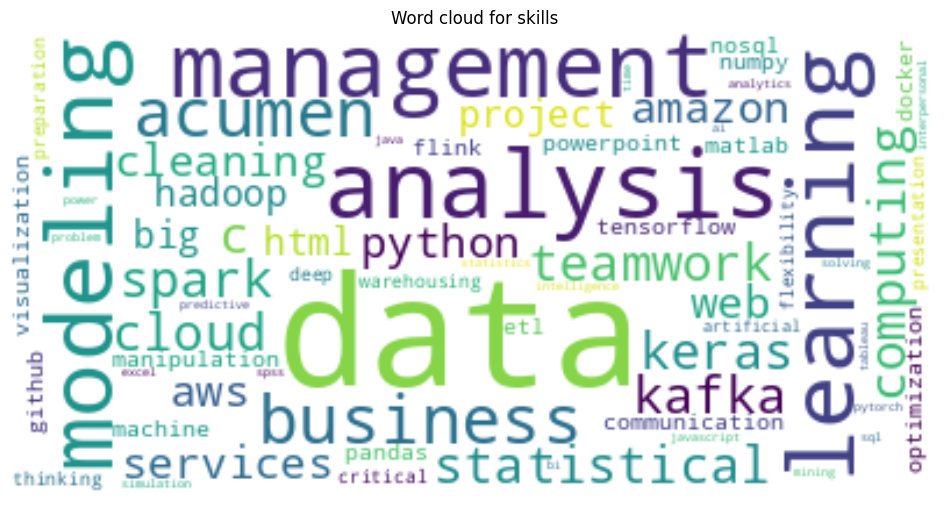

In [ ]:
# Word cloud for skills
a = total_skills
skills_combined =' '.join(a)
wordcloud = WordCloud(background_color='white').generate(skills_combined)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud for skills")
plt.show()

In [ ]:
# Percentage of skills in job description
skills_column = df_skills.columns.tolist()
percentage = []
for i in skills_column:
  percent = (df_skills[i].sum()/df_skills.shape[0])*100
  percentage.append(percent)
percentage_skills_df = pd.DataFrame({'Skills': skills_column, 'Percentage': percentage})
percentage_skills_df

,Skills,Percentage
0,business acumen,3.481625
1,statistical analysis,9.090909
2,c,9.864603
3,teamwork,4.061896
4,keras,2.450032
5,data analysis,29.142489
6,spark,8.317215
7,kafka,1.740812
8,cloud computing,2.385558
9,data cleaning,1.547389


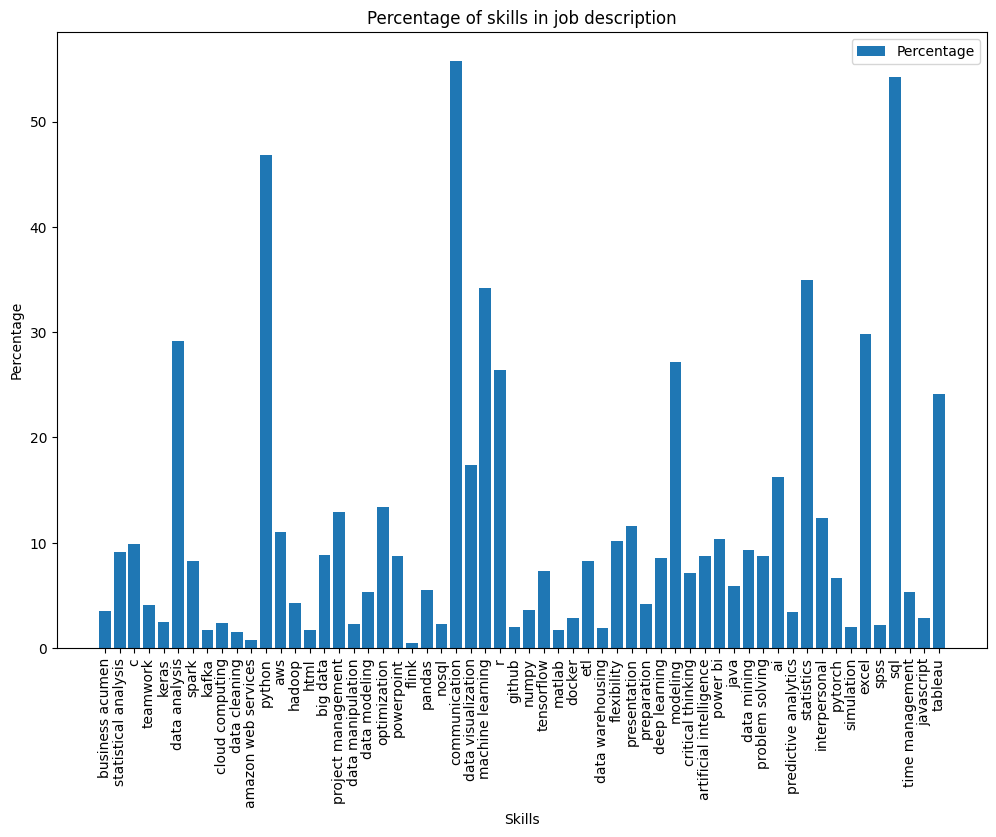

In [ ]:
# Plot of percentage of skills in job description
plt.figure(figsize=(12,8))
plt.bar(percentage_skills_df['Skills'], percentage_skills_df['Percentage'], label='Percentage')
plt.xlabel('Skills')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of skills in job description')
plt.legend()
plt.show()

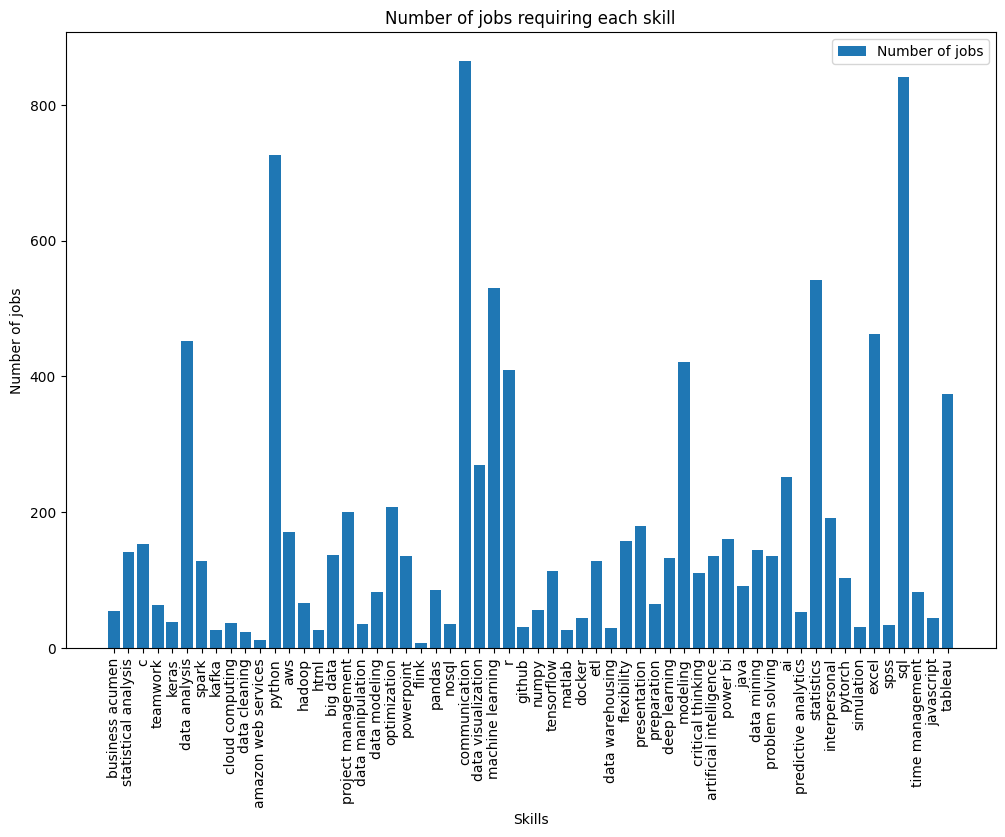

In [ ]:
# Number of jobs requiring each skill
skill_count = df_skills.sum(axis=0)
plt.figure(figsize=(12,8))
plt.bar(skills_column, skill_count.values, label='Number of jobs')
plt.xlabel('Skills')
plt.ylabel('Number of jobs')
plt.xticks(rotation=90)
plt.title('Number of jobs requiring each skill')
plt.legend()
plt.show()

In [ ]:
# Calculating the average salary for each skill
skills_df_temp = df_final.explode('Skills')
avg_salary_by_skill = skills_df_temp.groupby('Skills')['Salary'].mean()

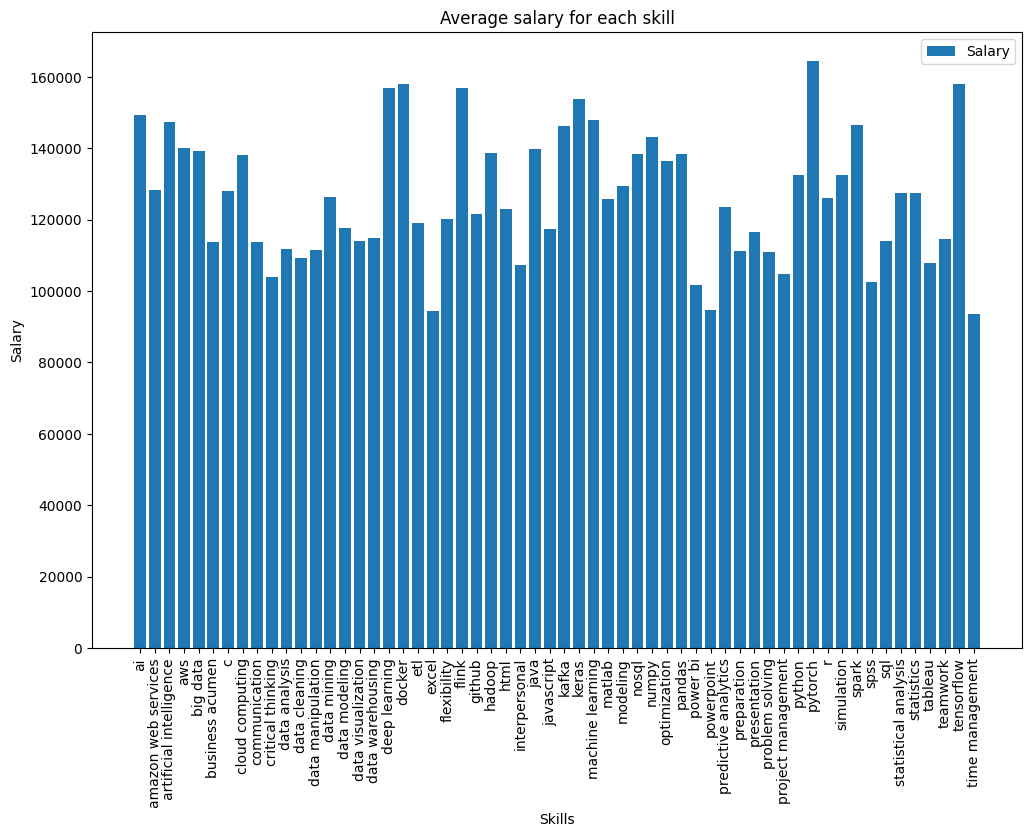

In [ ]:
# Average salary for each skill
plt.figure(figsize=(12,8))
plt.bar(avg_salary_by_skill.index, avg_salary_by_skill.values, label='Salary')
plt.xlabel('Skills')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.title('Average salary for each skill')
plt.legend()
plt.show()

a). For this part, I began by manually defining a list of skills based on my own knowledge. Then, using the ChatGPT (gpt-3.5-turbo model), I extracted additional skills and stored them in a separate list. I then combined both lists, removing any duplicates. Each skill in the combined list was then compared to the pre-processed job descriptions column. If the skill was present in a job description, it was assigned a value of 1, otherwise, it was assigned a value of 0. Finally, a pandas dataframe was created with columns representing each skill and the values being either 0 or 1.<br>
b). Several visualizations were created based on the skills identified in the previous step. Word clouds were generated for each skill. The percentage of job postings that mention each skill was plotted to identify the most in-demand skills. The number of job postings that require each skill was also plotted to identify the most requested skills. Finally, the average salary associated with each skill was plotted to identify the most lucrative skills in the market. All the plots are shown in the appendix.


# **3. Hierarchical clustering implementation**

In [ ]:
df_skills

,business acumen,statistical analysis,c,teamwork,keras,data analysis,spark,kafka,cloud computing,data cleaning,...,statistics,interpersonal,pytorch,simulation,excel,spss,sql,time management,javascript,tableau
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1547,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1548,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1549,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Computing the distance matrix
dist = pdist(df_skills.T, metric='cosine')
dist_matrix = squareform(dist)
distance_matrix = pd.DataFrame(data = dist_matrix, columns = skills_column, index = skills_column)
distance_matrix

,business acumen,statistical analysis,c,teamwork,keras,data analysis,spark,kafka,cloud computing,data cleaning,...,statistics,interpersonal,pytorch,simulation,excel,spss,sql,time management,javascript,tableau
business acumen,0.000000,0.919778,0.911987,0.931421,1.000000,0.916790,0.916130,0.973811,0.977628,1.000000,...,0.842178,0.941074,1.000000,0.951118,0.892371,1.000000,0.821685,0.969944,1.000000,0.852230
statistical analysis,0.919778,0.000000,0.931916,0.946949,0.972677,0.766292,0.918438,1.000000,0.944620,0.965619,...,0.746785,0.890601,0.950212,0.954624,0.855032,0.870015,0.732835,0.925600,0.936520,0.856296
c,0.911987,0.931916,0.000000,0.898145,0.934426,0.855500,0.864758,0.906648,0.906964,0.950493,...,0.753445,0.877475,0.848648,0.898358,0.849550,0.958405,0.779767,0.964289,0.865933,0.849505
teamwork,0.931421,0.946949,0.898145,0.000000,1.000000,0.881480,0.955629,0.975754,0.979288,0.974283,...,0.886355,0.845429,0.962758,0.977372,0.865186,0.978393,0.839256,0.846956,0.981007,0.882736
keras,1.000000,0.972677,0.934426,1.000000,0.000000,0.946588,0.828606,0.906341,0.839986,1.000000,...,0.839736,0.976585,0.568428,0.912593,0.992453,1.000000,0.904905,0.982086,0.975544,0.966447
data analysis,0.916790,0.766292,0.855500,0.881480,0.946588,0.000000,0.842631,0.972844,0.922673,0.903988,...,0.575722,0.769172,0.921212,0.864833,0.638928,0.870934,0.526396,0.880532,0.879454,0.625445
spark,0.916130,0.918438,0.864758,0.955629,0.828606,0.842631,0.000000,0.695003,0.782882,0.982028,...,0.712579,0.904688,0.722389,0.905120,0.938557,1.000000,0.714612,0.980554,0.893814,0.904393
kafka,0.973811,1.000000,0.906648,0.975754,0.906341,0.972844,0.695003,0.000000,0.968361,1.000000,...,0.942135,0.958333,0.905187,1.000000,0.964186,1.000000,0.880548,1.000000,0.970987,0.960195
cloud computing,0.977628,0.944620,0.906964,0.979288,0.839986,0.922673,0.782882,0.968361,0.000000,1.000000,...,0.872892,0.988136,0.870410,0.940946,0.961757,1.000000,0.886621,1.000000,0.950432,0.931993
data cleaning,1.000000,0.965619,0.950493,0.974283,1.000000,0.903988,0.982028,1.000000,1.000000,0.000000,...,0.886018,0.970537,1.000000,1.000000,0.943020,0.894979,0.873302,1.000000,0.969227,0.936670


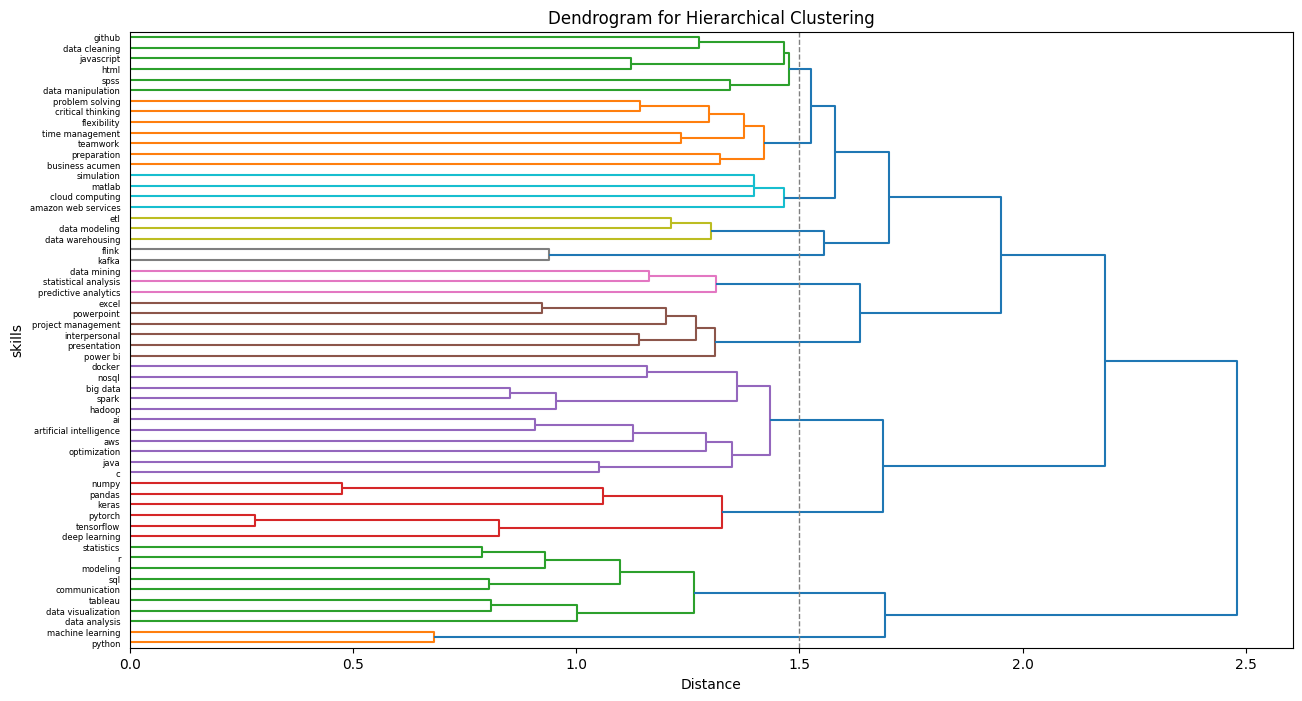

In [ ]:
# Plotting the dendrogram for hierarchical clustering
plt.figure(figsize=(15,8))
Z = linkage(distance_matrix, method='complete')
dendrogram(Z, labels=skills_column, orientation='right', color_threshold= 1.5)
plt.axvline(x=1.5, c='grey', lw=1, linestyle='dashed')
plt.xlabel('Distance')
plt.ylabel('skills')
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [ ]:
# Hierarchical clustering results
cluster = fcluster(Z, t=1.5, criterion='distance')
num_clusters = len(set(cluster))
hierarchical_cluster = {i+1: [] for i in range(num_clusters)}
for i, j in enumerate(skills_column):
  cluster_h = cluster[i]
  hierarchical_cluster[cluster_h].append(j)
for i, j in hierarchical_cluster.items():
  print(f"Cluster {i}: {j}")

Cluster 1: ['python', 'machine learning']
Cluster 2: ['data analysis', 'communication', 'data visualization', 'r', 'modeling', 'statistics', 'sql', 'tableau']
Cluster 3: ['keras', 'pandas', 'numpy', 'tensorflow', 'deep learning', 'pytorch']
Cluster 4: ['c', 'spark', 'aws', 'hadoop', 'big data', 'optimization', 'nosql', 'docker', 'artificial intelligence', 'java', 'ai']
Cluster 5: ['project management', 'powerpoint', 'presentation', 'power bi', 'interpersonal', 'excel']
Cluster 6: ['statistical analysis', 'data mining', 'predictive analytics']
Cluster 7: ['kafka', 'flink']
Cluster 8: ['data modeling', 'etl', 'data warehousing']
Cluster 9: ['cloud computing', 'amazon web services', 'matlab', 'simulation']
Cluster 10: ['business acumen', 'teamwork', 'flexibility', 'preparation', 'critical thinking', 'problem solving', 'time management']
Cluster 11: ['data cleaning', 'html', 'data manipulation', 'github', 'spss', 'javascript']


Out of the 11 clusters, 9 have at least 3 skills, and the remaining 2 have 2 skills. For this assignment, the focus is exclusively on the 9 clusters that consist of at least 3 skills.

**Cluster 1:** Data Analysis, Communication, Data Visualization, R, Modeling, Statistics, Sql, Tableau<br>
**Cluster 2:** Keras, Pandas, Numpy, Tensorflow, Deep Learning, Pytorch<br>
**Cluster 3:** C, Spark, AWS, Hadoop, Big Data, Optimization, Nosql, Docker, Artificial Intelligence, Java, AI<br>
**Cluster 4:** Project Management, Powerpoint, Presentation, Power BI, Interpersonal, Excel<br>
**Cluster 5:** Statistical Analysis, Data Mining, Predictive Analytics<br>
**Cluster 6:** Data Modeling, ETL, Data Warehousing<br>
**Cluster 7:** Cloud Computing, Amazon Web Services, Matlab, Simulation<br>
**Cluster 8:** Business Acumen, Teamwork, Flexibility, Preparation, Critical Thinking, Problem Solving, Time Management<br>
**Cluster 9:** Data Cleaning, Html, Data Manipulation, Github, SPSS, Javascript<br>

# **Course curriculum for a new "Master of Business and Management in Data Science and Artificial Intelligence" program at University of Toronto** - Based on hierarchical clustering results<br>
**Course 1: Data Science Fundamentals: From Statistics to Visualization**<br>
Course material - Data Analysis, Communication, Data Visualization, R, Modeling, Statistics, Sql, Tableau<br>
**Course 2: Applied Deep Learning with Python Libraries**<br>
Course material - Keras, Pandas, Numpy, Tensorflow, Deep Learning, Pytorch<br>
**Course 3: Big Data and AI Infrastructure with Java and AWS** <br>
Course material - C, Spark, AWS, Hadoop, Big Data, Optimization, Nosql, Docker, Artificial Intelligence, Java, AI<br>
**Course 4: Data Analytics and Visualization for Business Professionals** <br>
Course material - Project Management, Powerpoint, Presentation, Power BI, Interpersonal, Excel<br>
**Course 5: Advanced Data Analysis: Statistical Modeling and Predictive Analytics** <br>
Course material - Statistical Analysis, Data Mining, Predictive Analytics<br>
**Course 6: Data Warehousing and ETL for Business Intelligence** <br>
Course material - Data Modeling, ETL, Data Warehousing<br>
**Course 7: Cloud Computing and Simulation with MATLAB on AWS** <br>
Course material - Cloud Computing, Amazon Web Services, Matlab, Simulation<br>
**Course 8: Professional Development for Effective Teamwork and Problem Solving** <br>
Course material - Business Acumen, Teamwork, Flexibility, Preparation, Critical Thinking, Problem Solving, Time Management<br>
**Course 9: Data Science Tools and Techniques: From Data Cleaning to Visualization** <br>
Course material - Data Cleaning, Html, Data Manipulation, Github, SPSS, Javascript<br>

a). In this project, a distance matrix is computed by calculating the cosine distance between every pair of skills. The resulting values are then stored in a pandas dataframe where both the column and index represent each skill. Subsequently, a dendrogram is used to plot the clustering result with complete linkage. Each resulting cluster is color-coded and represented by a distinct color.<br>
To create 8 to 12 courses, a threshold of 1.5 is applied to the distance matrix, which leads to the formation of 11 clusters. The resulting clusters are displayed in Figure 7.a in the appendix. Out of the 11 clusters, 9 have at least 3 skills, and the remaining 2 have 2 skills. For this assignment, the focus is exclusively on the 9 clusters that consist of at least 3 skills. The course curriculum is shown in Figure 7.b in the appendix.


# **4. K-means or DBSCAN clustering implementation**

In [ ]:
# Engineer 10 unique features
# 1. Skill frequency
Skills_features = pd.DataFrame(data = df_skills.sum(), columns = ['Skill Frequency'], index = skills_column)

# 2. Average salary for skill
Skills_features['Average Salary'] = avg_salary_by_skill.values

# 3. Binary indication of soft skill
soft_skills = ['business acumen', 'time management', 'flexibility', 'teamwork', 'critical thinking', 'communication', 'interpersonal', 'problem solving']
Skills_features['Soft Skill'] = Skills_features.index.isin(soft_skills).astype(int)

# 4. Binary indication of hard skill
hard_skills = list(set(total_skills) - set(soft_skills))
Skills_features['Hard Skill'] = Skills_features.index.isin(hard_skills).astype(int)

# 5. Distance matrix (taking average between each skill)
Skills_features['Average_distance_matrix'] = distance_matrix.mean()

# 6. correlation (taking average between each skill)
corr = df_skills.corr()
Skills_features['Average_correlation'] = corr.mean()

# 7. Binary indication of if skill is in demand (above average salary)
Skills_features['In Demand'] = (Skills_features['Average Salary'] > Skills_features['Average Salary'].mean()).astype(int)

# 8. Number of correlated skill
corr_count = (corr.abs() > 0.5).sum(axis=1) - 1
Skills_features['Correlated Skills'] = corr_count

# 9. Standard deviation of distance matrix
Skills_features['Standard Deviation Distance Matrix'] = distance_matrix.std()

# 10. Binary indication of if skill is frequently requested
Skills_features['Frequently Requested'] = (Skills_features['Skill Frequency'] > Skills_features['Skill Frequency'].quantile(0.75)).astype(int)
Skills_features

,Skill Frequency,Average Salary,Soft Skill,Hard Skill,Average_distance_matrix,Average_correlation,In Demand,Correlated Skills,Standard Deviation Distance Matrix,Frequently Requested
business acumen,54,149329.425794,1,0,0.920050,0.026994,1,0,0.135111,0
statistical analysis,141,128216.833333,0,1,0.878107,0.037554,1,0,0.139727,0
c,153,147225.270588,0,1,0.859558,0.052781,1,0,0.133938,0
teamwork,63,140014.551462,1,0,0.909602,0.032975,1,0,0.131171,0
keras,38,139300.170073,0,1,0.893077,0.063770,1,0,0.162099,0
data analysis,452,113620.879630,0,1,0.811279,0.039309,0,0,0.153664,1
spark,129,127880.422222,0,1,0.817565,0.107439,1,0,0.157742,0
kafka,27,138149.583784,0,1,0.900361,0.063010,1,0,0.150278,0
cloud computing,37,113702.990509,0,1,0.899180,0.058329,0,0,0.133640,0
data cleaning,24,104025.744545,0,1,0.940158,0.023985,0,0,0.131754,0


In [ ]:
# K-means clustering with number of clusters as 10
scaler = StandardScaler()
X = scaler.fit_transform(Skills_features)
kmeans = KMeans(n_clusters=10)
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred
cluster_results = {i+1: [] for i in range(10)}
for i, j in enumerate(skills_column):
  cluster = kmeans_pred[i]
  cluster_results[cluster+1].append(j)
for i, j in cluster_results.items():
  print(f"Cluster {i}: {j}")

Cluster 1: ['data analysis', 'cloud computing', 'html', 'big data', 'project management', 'github', 'power bi', 'simulation', 'time management']
Cluster 2: ['business acumen', 'c', 'numpy', 'matlab', 'flexibility', 'interpersonal']
Cluster 3: ['statistical analysis', 'spark', 'hadoop', 'docker', 'etl', 'predictive analytics', 'excel', 'spss']
Cluster 4: ['powerpoint', 'modeling', 'tableau']
Cluster 5: ['data manipulation', 'data modeling', 'pandas', 'tensorflow', 'ai', 'javascript']
Cluster 6: ['teamwork', 'keras', 'kafka', 'communication', 'r', 'data warehousing', 'presentation', 'preparation']
Cluster 7: ['data cleaning', 'deep learning', 'data mining', 'pytorch']
Cluster 8: ['amazon web services', 'python', 'aws', 'machine learning', 'artificial intelligence', 'java', 'sql']
Cluster 9: ['optimization', 'flink', 'nosql', 'data visualization', 'critical thinking']
Cluster 10: ['problem solving', 'statistics']


Out of the 10 clusters formed, 9 clusters contain at least 3 skills while the remaining cluster consists of only 2 skills. For the purpose of this assignment, only the 9 clusters containing at least 3 skills were considered.

**Cluster 1:** Data Analysis, Cloud Computing, Html, Big Data, Project Management, Github, Power BI, Simulation, Time Management<br>
**Cluster 2:** Business Acumen, C, Numpy, Matlab, Flexibility, Interpersonal<br>
**Cluster 3:** Statistical Analysis, Spark, Hadoop, Docker, ETL, Predictive Analytics, Excel, SPSS<br>
**Cluster 4:** Powerpoint, Modeling, Tableau<br>
**Cluster 5:** Data Manipulation, Data Modeling, Pandas, Tensorflow, AI, Javascript<br>
**Cluster 6:** Teamwork, Keras, Kafka, Communication, R, Data Warehousing, Presentation, Preparation<br>
**Cluster 7:** Data Cleaning, Deep Learning, Data Mining, Pytorch<br>
**Cluster 8:** Amazon Web Services, Python, AWS, Machine Learning, Artificial Intelligence, Java, Sql<br>
**Cluster 9:** Optimization, Flink, Nosql, Data Visualization, Critical Thinking<br>

# **Course curriculum for a new "Master of Business and Management in Data Science and Artificial Intelligence" program at University of Toronto** - Based on K-means clustering results<br>
**Course 1: Data Science and Cloud Computing: Strategies for Successful Project Management**<br>
Course material - Data Analysis, Cloud Computing, Html, Big Data, Project Management, Github, Power BI, Simulation, Time Management<br>
**Course 2: Applied Data Science with Business Acumen and Interpersonal Skills**<br>
Course material - Business Acumen, C, Numpy, Matlab, Flexibility, Interpersonal<br>
**Course 3: Big Data Analytics with Spark, Hadoop, and Predictive Analytics** <br>
Course material - Statistical Analysis, Spark, Hadoop, Docker, ETL, Predictive Analytics, Excel, SPSS<br>
**Course 4: Data Visualization and Presentation** <br>
Course material - Powerpoint, Modeling, Tableau<br>
**Course 5: Data Engineering with Python and Tensorflow** <br>
Course material - Data Manipulation, Data Modeling, Pandas, Tensorflow, AI, Javascript<br>
**Course 6: Data Modeling and Database Design for Analytics** <br>
Course material - Teamwork, Keras, Kafka, Communication, R, Data Warehousing, Presentation, Preparation<br>
**Course 7: Fundamentals of Deep Learning** <br>
Course material - Data Cleaning, Deep Learning, Data Mining, Pytorch<br>
**Course 8: Developing AI Applications** <br>
Course material - Amazon Web Services, Python, AWS, Machine Learning, Artificial Intelligence, Java, Sql<br>
**Course 9: The Art of Data Analysis** <br>
Course material - Optimization, Flink, Nosql, Data Visualization, Critical Thinking<br>

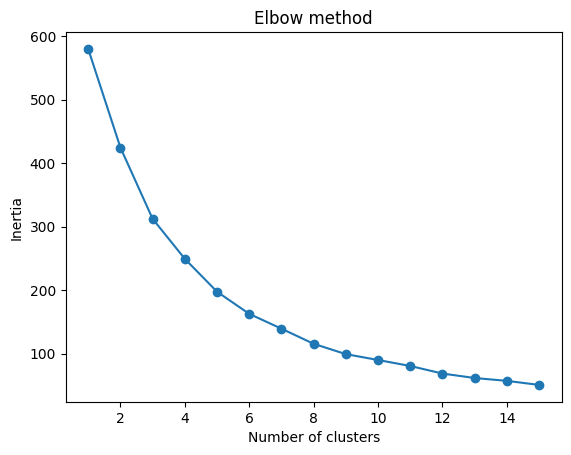

In [ ]:
# Finding the optimal k number of clusters
a = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    a.append(kmeans.inertia_)

plt.plot(range(1,16), a, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

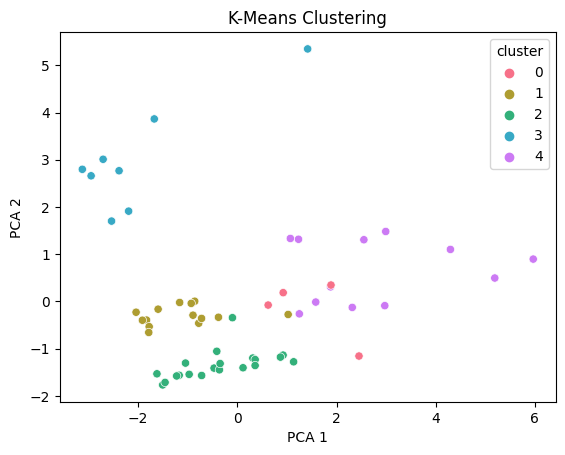

In [ ]:
# Scatter plot the optimal k found in the elbow method
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['PCA 1','PCA 2'])
results['cluster'] = kmeans.labels_
color = sns.color_palette("husl", len(set(kmeans.labels_)))
sns.scatterplot(x="PCA 1", y="PCA 2", hue="cluster", data=results, palette=color)
plt.title('K-Means Clustering')
plt.show()

a). In this part, K-means is chosen. It works by randomly initializing k centroids, assigning each data point to the nearest centroid, and then updating the centroids based on the mean of the data points in each cluster. This process is repeated until the centroids no longer change significantly.<br> 
A set of 10 features were engineered to describe each skill for clustering. These features include Skill frequency, Average salary for skill, Binary indication of soft skill, Binary indication of hard skill, Distance matrix (taking the average between each skill), correlation (taking the average between each skill), Binary indication of if the skill is in demand (above average salary), Number of correlated skill, Standard deviation of the distance matrix, and Binary indication of if the skill is frequently requested. These features were carefully selected to ensure that they capture important characteristics of each skill, such as frequency, demand, correlation with other skills, and skill type. <br>
The K-means clustering algorithm was utilized to group skills with similar feature values, using the aforementioned 10 engineered features and setting n_clusters to 10, in order to create a course curriculum consisting of 8 to 12 courses. The clusters obtained from this process are depicted in Figure 11.a in the appendix. Out of the 10 clusters formed, 9 clusters contain at least 3 skills while the remaining cluster consists of only 2 skills. With regards to this assignment, only the 9 clusters containing at least 3 skills were considered. The course curriculum can be found in Figure 11.b in the appendix.<br>
b). The Elbow method was applied to identify the most suitable number of clusters (k) for the K-means algorithm. To do this, the k-means model was fitted with k values ranging from 1 to 15, and the corresponding inertia values were recorded. A plot of inertia versus the number of clusters was generated, and the elbow point was observed at k=5, indicating that five clusters are the optimal choice for this dataset. The plot is shown in Figure 13 in the appendix. The K-means algorithm was then run with k=5, and principal component analysis was performed to reduce the dimensions. Finally, a scatterplot was generated to visualize the resulting clusters. It is shown in Figure 14 in the appendix.


# **5.  Interpretation of results and visualizations**

a). In part 3, a dendrogram was generated to visualize the clustering results from the hierarchical clustering algorithm and is shown in Figure 9 in the appendix. Each resulting cluster is color-coded and represented by a distinct color. Out of the 11 clusters, 9 have at least 3 skills, and the remaining 2 have 2 skills. For this assignment, the focus is exclusively on the 9 clusters that consist of at least 3 skills. <br>
b). In part 4, a scatterplot was plotted to visualize the clustering results obtained from the k-means algorithm. Due to the presence of 10 features, a principal component analysis (PCA) was performed to reduce the dimensions of the data and enable the visualization of the graph in 2 dimensions. The number of resulting clusters was 5, which was determined using the elbow method. Each of these 5 clusters was assigned a unique color, and they were found to be visually distinct from one another.<br>
c). In part 4, an elbow plot was generated to determine the optimal number of clusters for K-Means clustering. The plot indicated inertia which is the sum of squared distances between each point in the cluster and the centroid of that cluster did not decrease significantly beyond 5 clusters. Hence, 5 was identified as the optimum number of clusters.


# **6.  Discussion and final course curriculum**

The course curriculum that has been finalized is based on the hierarchical clustering results from section 3. The rationale behind this decision is that hierarchical clustering is more appropriate when the number of clusters is not predetermined. Hierarchical clustering provides more flexibility than k-means clustering as it allows the creation of clusters at varying levels of granularity. Compared to k-means clustering, hierarchical clustering is more robust as it is not sensitive to the initial placement of centroids. Additionally, dendrograms, which are generated by hierarchical clustering, are beneficial in visualizing the clusters and can aid in the identification of significant clusters within the data.

# **The Course curriculum for a new "Master of Business and Management in Data Science and Artificial Intelligence" program at the University of Toronto**<br>
**Course 1: Data Science Fundamentals: From Statistics to Visualization**<br>
Course material - Data Analysis, Communication, Data Visualization, R, Modeling, Statistics, Sql, Tableau<br>
**Course 2: Applied Deep Learning with Python Libraries**<br>
Course material - Keras, Pandas, Numpy, Tensorflow, Deep Learning, Pytorch<br>
**Course 3: Big Data and AI Infrastructure with Java and AWS** <br>
Course material - C, Spark, AWS, Hadoop, Big Data, Optimization, Nosql, Docker, Artificial Intelligence, Java, AI<br>
**Course 4: Data Analytics and Visualization for Business Professionals** <br>
Course material - Project Management, Powerpoint, Presentation, Power BI, Interpersonal, Excel<br>
**Course 5: Advanced Data Analysis: Statistical Modeling and Predictive Analytics** <br>
Course material - Statistical Analysis, Data Mining, Predictive Analytics<br>
**Course 6: Data Warehousing and ETL for Business Intelligence** <br>
Course material - Data Modeling, ETL, Data Warehousing<br>
**Course 7: Cloud Computing and Simulation with MATLAB on AWS** <br>
Course material - Cloud Computing, Amazon Web Services, Matlab, Simulation<br>
**Course 8: Professional Development for Effective Teamwork and Problem Solving** <br>
Course material - Business Acumen, Teamwork, Flexibility, Preparation, Critical Thinking, Problem Solving, Time Management<br>
**Course 9: Data Science Tools and Techniques: From Data Cleaning to Visualization** <br>
Course material - Data Cleaning, Html, Data Manipulation, Github, SPSS, Javascript<br>

# **7.  OpenAI to describe clustering results**

In [ ]:
# Asking ChatGPT to describe the clustering results and give course name for each clusters
string = """I have a course curriculum based on the clusters from hierarchical clustering
Cluster 1: Data Analysis, Communication, Data Visualization, R, Modeling, Statistics, Sql, Tableau
Cluster 2: Keras, Pandas, Numpy, Tensorflow, Deep Learning, Pytorch
Cluster 3: C, Spark, AWS, Hadoop, Big Data, Optimization, Nosql, Docker, Artificial Intelligence, Java, AI
Cluster 4: Project Management, Powerpoint, Presentation, Power BI, Interpersonal, Excel
Cluster 5: Statistical Analysis, Data Mining, Predictive Analytics
Cluster 6: Data Modeling, ETL, Data Warehousing
Cluster 7: Cloud Computing, Amazon Web Services, Matlab, Simulation
Cluster 8: Business Acumen, Teamwork, Flexibility, Preparation, Critical Thinking, Problem Solving, Time Management
Cluster 9: Data Cleaning, Html, Data Manipulation, Github, SPSS, Javascript
Describe what is common amongst these clusters and give course name for each clusters naming as course 1, course 2, etc?"""
response_final = ChatGPT_info(string)

In [ ]:
# Printing the response from ChatGPT
print(response_final.choices[-1].message.content)

What is common among all the clusters is that they all involve skills and knowledge related to data and its analysis, along with various tools and technologies used for this purpose. 

Course 1: "Data Analysis and Visualization" - covering topics such as data analysis, communication, data visualization, R, modeling, statistics, SQL, and Tableau.

Course 2: "Deep Learning with Python" - covering topics such as Keras, Pandas, Numpy, Tensorflow, Deep Learning, and PyTorch.

Course 3: "Big Data and AI" - covering topics such as C, Spark, AWS, Hadoop, NoSQL, Optimization, Docker, Artificial Intelligence, Java, and AI. 

Course 4: "Project Management and Presentation Skills" - covering topics such as project management, PowerPoint, presentation, Power BI, interpersonal skills, and Excel. 

Course 5: "Predictive Analytics and Data Mining" - covering topics such as statistical analysis, data mining, and predictive analytics. 

Course 6: "Data Modeling and Warehousing" - covering topics such as

Using OpenAI, I asked ChatGPT to describe the common characteristics shared by the clusters in the final course curriculum and to provide a course name for each cluster. The results can be found in Figure 15 in the appendix.